## Tennis Project
### Question 10

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
root_path = Path("../data")

In [3]:
home_files = list(root_path.rglob("home_team_*.parquet"))
away_files = list(root_path.rglob("away_team_*.parquet"))

In [8]:
df = pd.read_parquet(file, engine="fastparquet")
df.head()

,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
0,12156295,Collins D.,collins-danielle,F,6864,"St. Petersburg, FL, USA","St. Petersburg, FL, USA",1.78,NaN,right-handed,2014,1158669,6743563,58515,15,COL,USA,"Collins, Danielle"


In [9]:
dfs = []

for file in (home_files + away_files)[:200]:
    df = pd.read_parquet(file, engine="fastparquet")
    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)
df_all.head()

,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
0,12156295,Collins D.,collins-danielle,F,6864,"St. Petersburg, FL, USA","St. Petersburg, FL, USA",1.78,NaN,right-handed,2014,1158669.0,6743563.0,58515,15.0,COL,USA,"Collins, Danielle"
1,12157171,Dimitrov G.,dimitrov-grigor,M,28927,"Monte Carlo, Monaco","Haskovo, Bulgaria",1.91,81.0,right-handed,2008,952941.0,21900208.0,23581,9.0,DIM,Bulgaria,"Dimitrov, Grigor"
2,12173700,Albot R.,albot-radu,M,2309,"Chisinau, Moldova","Chisinau, Moldova",1.75,69.0,right-handed,2008,52648.0,4240082.0,44547,132.0,ALB,Moldova,"Albot, Radu"
3,12173714,Hassan B.,hassan-benjamin,M,1320,Germany,"Merzig, Germany",1.83,85.0,right-handed,NaN,57103.0,210248.0,108767,158.0,HAS,Germany,"Hassan, Benjamin"
4,12173950,Passaro F.,passaro-francesco,M,2835,NaN,"Perugia, Italy",1.80,NaN,right-handed,NaN,42063.0,483728.0,258908,200.0,PAS,Italy,"Passaro, Francesco"


In [11]:
df_all.columns

Index(['match_id', 'name', 'slug', 'gender', 'user_count', 'residence',
       'birthplace', 'height', 'weight', 'plays', 'turned_pro',
       'current_prize', 'total_prize', 'player_id', 'current_rank',
       'name_code', 'country', 'full_name'],
      dtype='object')

In [12]:
df_all = df_all[df_all["height"].notna()]
df_all = df_all[df_all["current_rank"].notna()]

df_all["height"] = pd.to_numeric(df_all["height"], errors="coerce")
df_all["current_rank"] = pd.to_numeric(df_all["current_rank"], errors="coerce")

df_all = df_all.dropna(subset=["height", "current_rank"])

df_all.head()

,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
0,12156295,Collins D.,collins-danielle,F,6864,"St. Petersburg, FL, USA","St. Petersburg, FL, USA",1.78,NaN,right-handed,2014,1158669.0,6743563.0,58515,15.0,COL,USA,"Collins, Danielle"
1,12157171,Dimitrov G.,dimitrov-grigor,M,28927,"Monte Carlo, Monaco","Haskovo, Bulgaria",1.91,81.0,right-handed,2008,952941.0,21900208.0,23581,9.0,DIM,Bulgaria,"Dimitrov, Grigor"
2,12173700,Albot R.,albot-radu,M,2309,"Chisinau, Moldova","Chisinau, Moldova",1.75,69.0,right-handed,2008,52648.0,4240082.0,44547,132.0,ALB,Moldova,"Albot, Radu"
3,12173714,Hassan B.,hassan-benjamin,M,1320,Germany,"Merzig, Germany",1.83,85.0,right-handed,NaN,57103.0,210248.0,108767,158.0,HAS,Germany,"Hassan, Benjamin"
4,12173950,Passaro F.,passaro-francesco,M,2835,NaN,"Perugia, Italy",1.80,NaN,right-handed,NaN,42063.0,483728.0,258908,200.0,PAS,Italy,"Passaro, Francesco"


In [13]:
correlation = df_all["height"].corr(df_all["current_rank"])
print(f"The correlation between player height and current ranking is: {correlation:.2f}")

The correlation between player height and current ranking is: 0.11


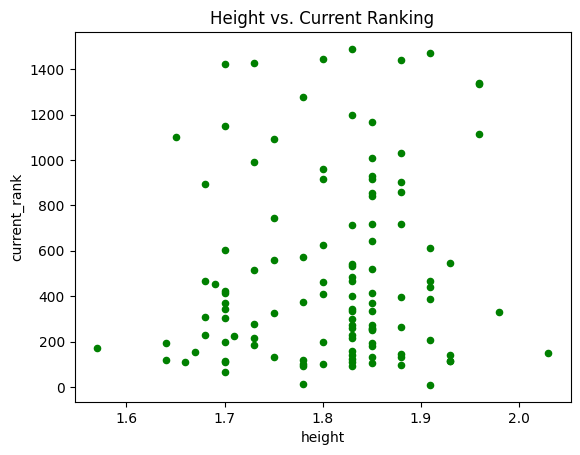

In [14]:
df_all.plot(kind="scatter", x="height", y="current_rank", title="Height vs. Current Ranking", color="green")
plt.show()

### Result:The correlation between player height and current ranking is 0.11, which shows almost no meaningful relationship between these two variables.